In [1]:
import plasp
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.sparse import rand
import random
import time
from sklearn.model_selection import train_test_split
from tools import *
from screening import *

In [7]:
from plasp.methods import Plasp, Diffrac, Diffusion
from plasp.regressors import KernelRegressor, DiffusionWeights

ModuleNotFoundError: No module named 'plasp.methods'

In [3]:
kernel = KernelRegressor(kernel=('linear', None))

NameError: name 'KernelRegressor' is not defined

# Generating the data

In [5]:
def make_data(param_set, noise=True):

    n = param_set[0]
    p = param_set[1]
    sparsity = param_set[2]
    X = np.zeros((n,p))
    y = np.zeros(n)
    true_params = rand(p, 1, density = sparsity).A.ravel()
    #print(np.linalg.norm(true_params, ord=1))
    sparse_ones = np.zeros(p)
    for i in range(p):
        if true_params[i] != 0:
            sparse_ones[i] = 1
    true_params = 2 * true_params - sparse_ones

    noise_norm = 0

    for i in range(n):
        # sample x in [-1,1]^p box
        x = 2 * np.random.rand(p) - np.ones(p) 
        X[i,:] = x
        y[i] = np.dot(true_params,x)
        if noise:
            w = np.random.randn(1) / 10
            y[i] += w
            noise_norm += (np.linalg.norm(w)) ** 2

    return X, y, true_params, np.sqrt(noise_norm)

In [6]:
param_set = (100, 10, 0.2)
X, y, true_params, _ = make_data(param_set)

In [23]:
#method = Diffrac('IR', kernel)
#s_train = np.empty((X.shape[0], 2))
#s_train[:,0] = y
#mu = 1
#s_train[:,1] = mu
X_train, X_test, y_train, y_test = train_test_split(X, y)
lasso_reg = Lasso(alpha=0.01).fit(X_train, y_train)
#lasso_reg.fit(X_train,y_train)
print(X_train.shape)
print(lasso_reg.score(X_test, y_test))
X_r, y_r = random_screening(X_train, y_train, 50)
lasso_r = Lasso(alpha=0.01).fit(X_r, y_r)
print(lasso_r.score(X_test, y_test))
print(lasso_r.coef_, lasso_reg.coef_)

(75, 10)
0.966396364954
0.956643285256
[ 0.         -0.8869114   0.01054177 -0.31263699 -0.         -0.01250442
 -0.          0.         -0.         -0.        ] [ 0.         -0.92428669  0.         -0.36411608 -0.         -0.01573215
  0.          0.         -0.          0.        ]


In [11]:
method.train(X, s_train, lambd=0)
method.kernel_reg.x_support.shape

NameError: name 'method' is not defined

# Screening the data

In [13]:
results = test_dataset_accelerated(X, y, lmbda=0.1, mu=1, n_steps=10)

Time to compute z and A: 0.007973432540893555
Time to test the entire dataset: 0.012259244918823242


# Plot the result

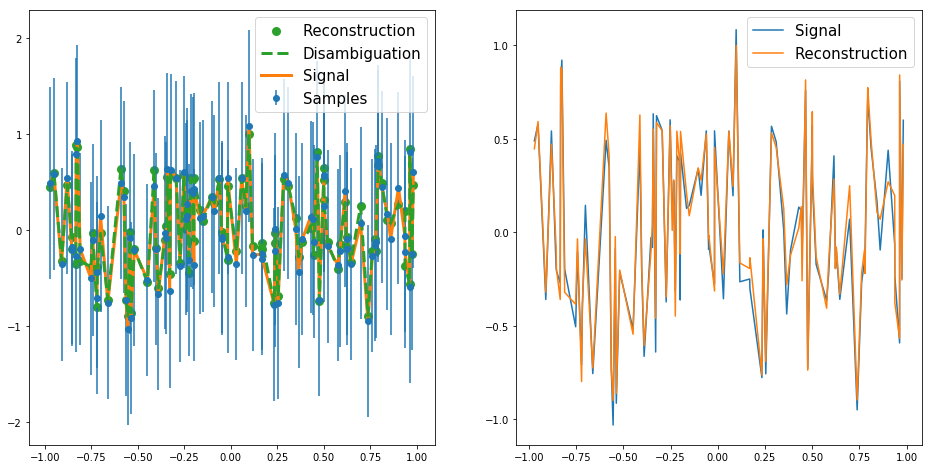

In [28]:
%matplotlib inline

dim = 5
x = X[:, dim]
ind = np.argsort(x)


fig, [ax_1, ax_2] = plt.subplots(1, 2, figsize=(16, 8))

a = ax_1.errorbar(X[ind,dim], s_train[ind, 0], yerr=s_train[ind, 1], fmt='o', color="C0")
b, = ax_1.plot(X[ind,dim], y[ind], linestyle="-", linewidth=3, color="C1")
c, = ax_1.plot(X[ind,dim], method(X)[ind], linestyle="--", linewidth=3, color="C2")
if hasattr(method, 'y_dis'):
    d = ax_1.scatter(X[:,dim], method.y_dis, linestyle="-", linewidth=3, color="C2")
    ax_1.legend([d, c, b, a], ["Reconstruction", "Disambiguation", "Signal", "Samples"],
                prop={"size": 15})
else:
    ax_1.legend([c, b, a], ["Reconstruction", "Signal", "Samples"], prop={"size": 15})
    ax_1.set_title("Learning", size=20)


a, = ax_2.plot(X[ind,dim], y[ind])
b, = ax_2.plot(X[ind,dim], method(X)[ind])
ax_2.legend([a, b], ["Signal", "Reconstruction"], prop={"size": 15})
#ax_2.set_title(r"$L^2$ Error: %.2f" %error, fontsize=20);